# UV-Near-Infrared Spectra Regression for Urea in Saline
UV-NIR spectra were measured for various concentrations of urea in 0.15M NaCl saline on 11/19/2021 using the Cary5000 in the chemistry building from 190-2500 nm.

In [2]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Set larger fontsize for all plots
plt.rcParams.update({'font.size': 14})

In [3]:
# Import data

abs_data = pd.read_csv('Datasets/urea_in_saline_uv_nir.csv')

In [4]:
abs_data

,Urea Conc. (mM),3000,2999,2998,2997,2996,2995,2994,2993,2992,...,199,198,197,196,195,194,193,192,191,190
0,0.5,-0.004525,-0.004511,-0.004733,-0.004982,-0.005159,-0.005245,-0.005385,-0.005520,-0.005835,...,0.053504,0.053560,0.053486,0.053882,0.054544,0.055369,0.055051,0.054595,0.056862,0.052532
1,0.5,0.029535,0.029840,0.029965,0.030102,0.030375,0.030524,0.030621,0.030928,0.030970,...,0.060639,0.060561,0.061145,0.060605,0.061667,0.063021,0.063261,0.062434,0.067644,0.062364
2,2.0,-0.015359,-0.015308,-0.015595,-0.015929,-0.015781,-0.016146,-0.016415,-0.016499,-0.016708,...,-0.000318,-0.003270,-0.003912,-0.003808,-0.002543,-0.003404,-0.004041,-0.003729,-0.004644,-0.003760
3,2.0,0.015512,0.015875,0.015960,0.016147,0.016187,0.016439,0.016582,0.016884,0.016985,...,0.006839,0.004705,0.003824,0.003926,0.004741,0.004097,0.003407,0.004785,0.004999,0.003983
4,5.0,-0.007704,-0.007802,-0.008077,-0.008225,-0.008448,-0.008511,-0.008659,-0.008920,-0.009119,...,0.039463,0.034964,0.034684,0.035229,0.035520,0.036255,0.034981,0.035495,0.036792,0.033767
5,5.0,0.028715,0.028926,0.029281,0.029247,0.029430,0.029778,0.029832,0.030233,0.030139,...,0.062434,0.058548,0.057964,0.058162,0.059199,0.060019,0.059519,0.059505,0.062893,0.059229
6,8.0,0.012563,0.012878,0.012995,0.013099,0.013254,0.013476,0.013582,0.013908,0.014011,...,-0.001884,-0.007517,-0.008421,-0.009291,-0.008773,-0.008765,-0.009344,-0.009003,-0.009875,-0.008980
7,8.0,-0.017267,-0.017460,-0.017426,-0.017700,-0.017883,-0.018200,-0.018312,-0.018487,-0.018711,...,-0.008768,-0.014474,-0.014928,-0.015455,-0.014899,-0.015541,-0.016573,-0.016285,-0.017931,-0.017376
8,15.0,0.018503,0.018796,0.018995,0.018857,0.019321,0.019415,0.019655,0.019852,0.019946,...,0.025961,0.018669,0.017207,0.017491,0.017584,0.018018,0.017142,0.017406,0.017559,0.017251
9,15.0,0.026297,0.026576,0.026722,0.026661,0.026950,0.027284,0.027349,0.027508,0.027686,...,0.054525,0.047463,0.046284,0.045817,0.047333,0.048565,0.047179,0.047011,0.048968,0.044521


#### Specify features (X) and target (y)

In [25]:
X = abs_data.iloc[:, 550:1000].values
y = abs_data[['Urea Conc. (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, shuffle=True)

#### Fit principal component analysis (PCA) and partial least squares (PLS) regression models to the POUR data

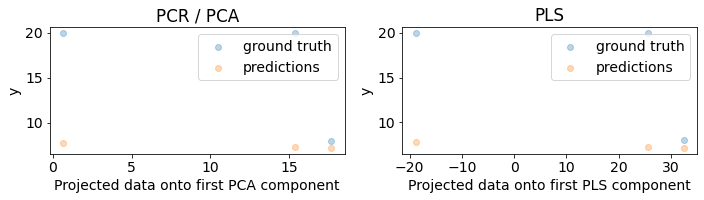

In [26]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

#### Print the R-squared values for each regression

In [27]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -2.244
PLS r-squared -2.249


#### Find best wavelength range

In [21]:
start_wl = np.linspace(311, 1311, num=90)
start_wl

array([ 311.        ,  322.23595506,  333.47191011,  344.70786517,
        355.94382022,  367.17977528,  378.41573034,  389.65168539,
        400.88764045,  412.12359551,  423.35955056,  434.59550562,
        445.83146067,  457.06741573,  468.30337079,  479.53932584,
        490.7752809 ,  502.01123596,  513.24719101,  524.48314607,
        535.71910112,  546.95505618,  558.19101124,  569.42696629,
        580.66292135,  591.8988764 ,  603.13483146,  614.37078652,
        625.60674157,  636.84269663,  648.07865169,  659.31460674,
        670.5505618 ,  681.78651685,  693.02247191,  704.25842697,
        715.49438202,  726.73033708,  737.96629213,  749.20224719,
        760.43820225,  771.6741573 ,  782.91011236,  794.14606742,
        805.38202247,  816.61797753,  827.85393258,  839.08988764,
        850.3258427 ,  861.56179775,  872.79775281,  884.03370787,
        895.26966292,  906.50561798,  917.74157303,  928.97752809,
        940.21348315,  951.4494382 ,  962.68539326,  973.92134

In [43]:
# Create integer lists of starting wavelengths and stopping wavelengths to probe
start_wl = np.linspace(1, 10, num=10)
start_wl = [round(x) for x in start_wl]
stop_wl = np.linspace(11, 100, num=90)
stop_wl = [round(x) for x in stop_wl]

# Initiate lists for results
starting_wavelength = []
stopping_wavelength = []
pcr_r_squared = []
pls_r_squared = []

for start in start_wl:
    for stop in stop_wl:
        X = abs_data.iloc[:, start:stop].values
        y = abs_data[['Urea Concentration (mM)']].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)
        
        pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
        pcr.fit(X_train, y_train)
        pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        pls = PLSRegression(n_components=1)
        pls.fit(X_train, y_train)
        
        starting_wavelength.append(start)
        stopping_wavelength.append(stop)
        pcr_r_squared.append(pcr.score(X_test, y_test))
        pls_r_squared.append(pls.score(X_test, y_test))
        
# Choose the highest pcr and pls scores and report
pcr_array = np.array(pcr_r_squared)
pcr_max_index = pcr_array.argmax()

pls_array = np.array(pls_r_squared)
pls_max_index = pls_array.argmax()

print(f'Max principal components regression (PCR) score: {pcr_r_squared[pcr_max_index]}')
print(f'Max PCR score starting wavelength: {starting_wavelength[pcr_max_index]}')
print(f'Max PCR score stopping wavelength: {stopping_wavelength[pcr_max_index]}')

print(f'Max partial least squasres (PLS) regression score: {pls_r_squared[pls_max_index]}')
print(f'Max PLS score starting wavelength: {starting_wavelength[pls_max_index]}')
print(f'Max PLS score stopping wavelength: {stopping_wavelength[pls_max_index]}')

Max principal components regression (PCR) score: -0.05920524019386009
Max PCR score starting wavelength: 1
Max PCR score stopping wavelength: 11
Max partial least squasres (PLS) regression score: -0.059236813895465534
Max PLS score starting wavelength: 1
Max PLS score stopping wavelength: 11
